In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data source: https://www.kaggle.com/datasets/pankeshpatel/hrcommasep


This is dataset useful for HR in a company. A company records different parameters of an employee (such as satisfaction level, Salary, number of promotion, left the company etc.) .

This dataset can be used to predict whether an employee leave the company or stay in the company.


* satisfaction_level: satisfaction level at job of an employee
* last_evaluation: Rating between 0 to 1, received by an employee at his last evaluation
* number_project: Number of projects, an employee involved in
* average_montly_hours: Average number of hours in a month, spent by an employee at office
* time_spend_company: Number of years spent in the company
* Work_accident: 0 - no accident during employee stay, 1 - accident during employee stay
* **left:** 0 indicates employee stays in the company, 1 indicates - employee left the company
* promotion_last_5years: Number of promotions in his stay
* Department: Department, an employee belongs to
* salary: Salary in USD


1. Do some exploratory data analysis to ﬁgure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. See the correlation between department and employee retention
4. Separate dependent and independent variables.
5. Split the data into train set and test set
6. Now build Logistic Regression model and do prediction for test data
7. Measure the accuracy of the model

In [2]:
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
df_hr.isnull().sum()
# no missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

#### histogram overview

<Figure size 432x288 with 0 Axes>

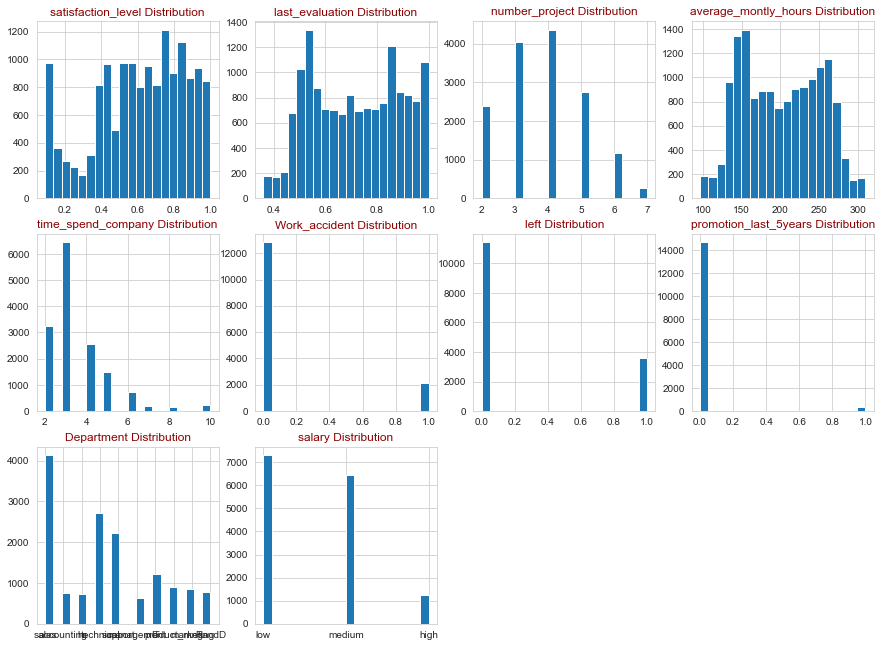

In [15]:
sns.set_style('whitegrid')
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+" Distribution", color='DarkRed')

plt.tight_layout()
draw_histograms(df_hr, df_hr.columns, 4, 4)
plt.show()

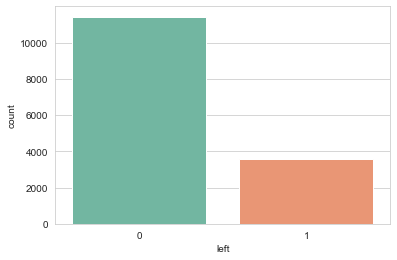

In [23]:
sns.countplot(x=df_hr.left, palette='Set2');

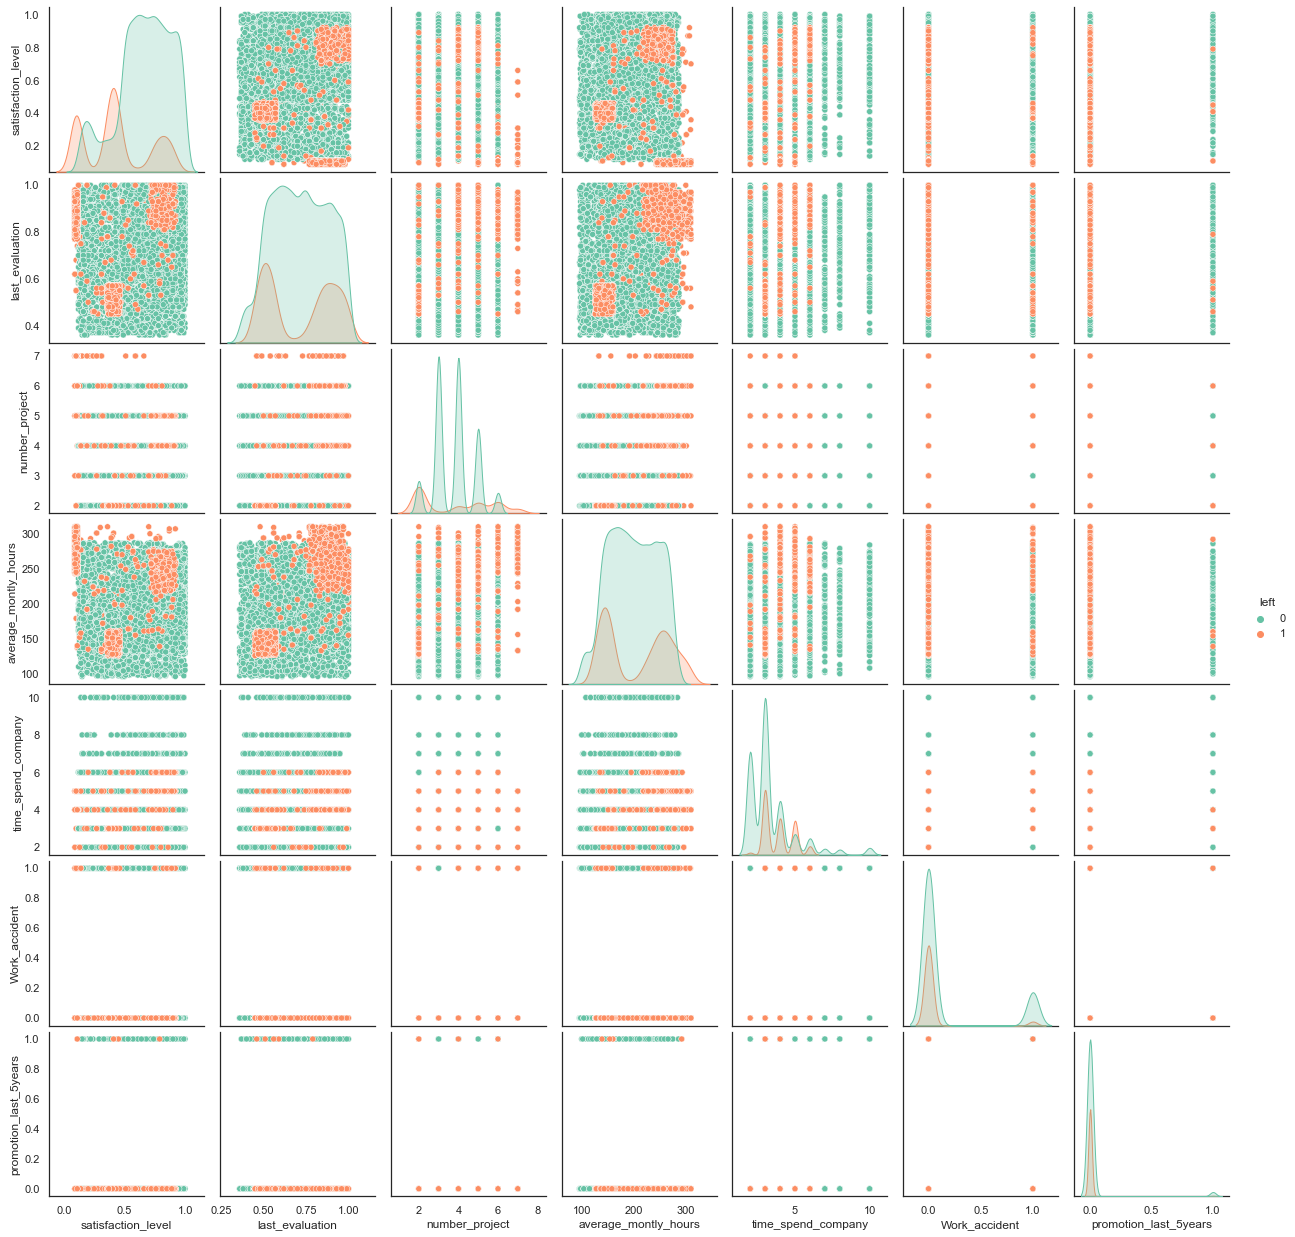

In [101]:
sns.pairplot(df_hr, hue='left', palette='Set2');

### correlation between features

In [78]:
df_hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### correlation heatmap

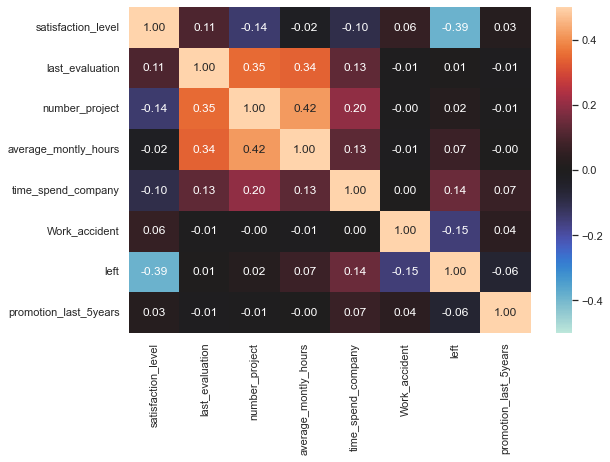

In [97]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_hr.corr(), vmax=0.5, vmin=-0.5, center=0, fmt='.2f', annot=True);

* A negative correlation (-0.39) between 'satisfaction_level' and 'left', means employees with high 'satisfaction_level' have lower possibility to leave.
* A positive correlation (0.14) between 'time_spend_company' and 'left', means employees with high 'time_spend_company' have higher possibility to leave.
* A negative correlation (-0.15) between 'work_accident' and 'left', means employees with high 'work_accident' have lower possibility to leave.

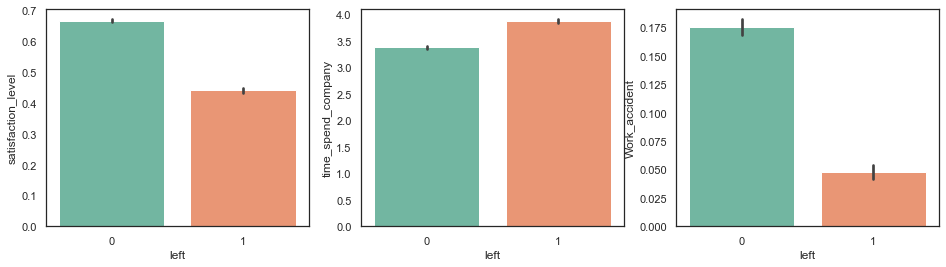

In [125]:
fig = plt.figure(figsize=(16,4))
#plt.subplot(131)
ax1 = fig.add_subplot(1, 3, 1)
sns.barplot(x='left', y='satisfaction_level', data=df_hr, palette='Set2')

#plt.subplot(132)
ax2 = fig.add_subplot(1, 3, 2)
sns.barplot(x='left', y='time_spend_company', data=df_hr, palette='Set2')

#plt.subplot(133)
ax1 = fig.add_subplot(1, 3, 3)
sns.barplot(x='left', y='Work_accident', data=df_hr, palette='Set2');

#### left / non-left employees in different department

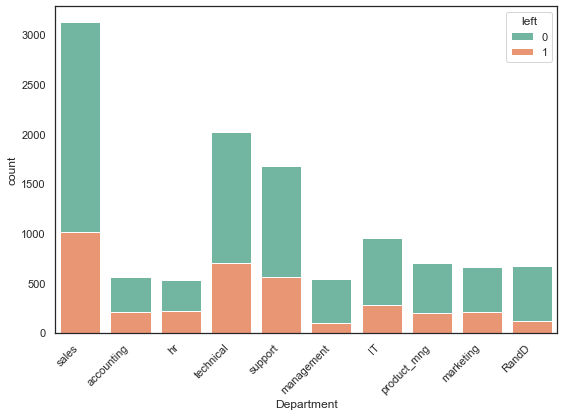

In [95]:
plt.subplots(figsize=(9, 6))
sns.countplot(x="Department", hue="left", data=df_hr, palette='Set2', dodge=False)
plt.xticks(rotation=45, ha='right');

A half-half left/ non-left in hr department, management and RandD department seem have lower left proportion for example.

#### left / non-left employees depending on salaries

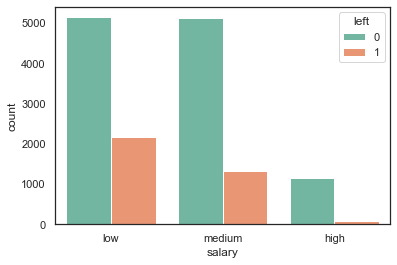

In [105]:
sns.countplot(x='salary', hue='left', data=df_hr, palette='Set2');

comparing employees with "low" and "medium" salary, those with low salary have high left proportion.

In [129]:
from sklearn.preprocessing import OrdinalEncoder

cat = df_hr.select_dtypes(include='object')
oe_col = cat.columns
df_oe = OrdinalEncoder().fit_transform(df_hr[oe_col])
pd.DataFrame(df_oe)

,0,1
0,7.0,1.0
1,7.0,2.0
2,7.0,2.0
3,7.0,1.0
4,7.0,1.0
...,...,...
14994,8.0,1.0
14995,8.0,1.0
14996,8.0,1.0
14997,8.0,1.0


In [130]:
num = df_hr.select_dtypes(exclude='object')
num.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

### 4. Separate dependent and independent variables.

In [134]:
X = pd.concat([pd.DataFrame(df_oe, columns=oe_col), df_hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]], axis=1)
X.head()

,Department,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,7.0,1.0,0.38,0.53,2,157,3,0,0
1,7.0,2.0,0.80,0.86,5,262,6,0,0
2,7.0,2.0,0.11,0.88,7,272,4,0,0
3,7.0,1.0,0.72,0.87,5,223,5,0,0
4,7.0,1.0,0.37,0.52,2,159,3,0,0


In [138]:
y = df_hr['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### 5. Split the data into train set and test set

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 6. Now build Logistic Regression model and do prediction for test data

In [143]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.7688683438527869

In [144]:
LR.score(X_test, y_test)

0.7586666666666667

In [145]:
predictions = LR.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### 7. Measure the accuracy of the model

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7586666666666667

In [150]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3312
           1       0.24      0.49      0.32       438

    accuracy                           0.76      3750
   macro avg       0.58      0.64      0.59      3750
weighted avg       0.84      0.76      0.79      3750



Model need to be improved...